In [1]:
# Topic 5: Review of SLR & Multiple linear regression - part 1
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pandas.plotting import scatter_matrix


# Graph plotting
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Tesla and SP500 data
returns = pd.read_csv('returns.csv')

Text(0, 0.5, 'Daily return of Tesla')

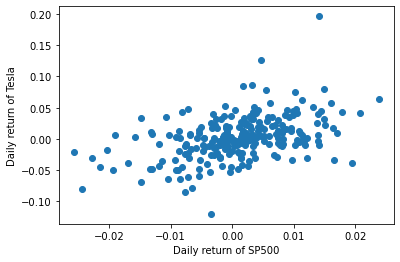

In [3]:
#Use the 2021 data instead of 2020
plt.scatter(returns['SP500'],returns['Tesla'])
plt.xlabel("Daily return of SP500")
plt.ylabel("Daily return of Tesla")

In [4]:
#Regression Output
model=sm.OLS(returns['Tesla'],sm.add_constant(returns['SP500'])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Tesla   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     62.86
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           7.37e-14
Time:                        13:36:00   Log-Likelihood:                 519.67
No. Observations:                 252   AIC:                            -1035.
Df Residuals:                     250   BIC:                            -1028.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.002      0.180      0.8

In [5]:
model.predict([1,0.02])

array([0.03783089])

In [ ]:
#Interval Prediction (Need further information on x_min and x_max)
plt.scatter(returns['SP500'],returns['Tesla'])
#plt.plot([x_min,x_max],model.predict([[1,x_min],[1,x_max]]),color = 'red',label = 'Fitted Line')
#plt.plot([x_min,x_max],model.get_prediction([[1,x_min],[1,x_max]]).summary_frame()['obs_ci_lower'].values,)
#plt.plot([x_min,x_max],model.get_prediction([[1,x_min],[1,x_max]]).summary_frame()['obs_ci_upper'].values,)

In [26]:
#Pharmacy Data
df_p = pd.read_csv('pharmacy profit.csv')
df_p

,Location,Profit,Income,Disposable Income,"Birth Rate (per 1,000)","Soc Security (per 1,000)","CV Death (per 100,000)",% 65 or Older
0,"Albany-Schenectady-Troy,NY",199780.0,28719,22701,13.1,177.7,429.9,14.6
1,"Albuquerque,NM",165530.0,25835,19890,15.8,143.8,222.9,10.7
2,"Altoona,PA",208670.0,22675,18051,11.6,179.8,561.5,17.6
3,"Anchorage,AK",166890.0,33501,27031,18.5,62.5,99.8,4.7
4,"Appleton-Oshkosh-Neenah,WI",209190.0,27107,21182,13.6,152.6,319.4,12.0
...,...,...,...,...,...,...,...,...
106,"Waterloo-CedarFalls,IA",211060.0,25170,19444,13.0,187.8,422.1,13.5
107,"WestPalmBeach-BocaRaton,FL",305020.0,29057,33519,13.3,255.2,528.4,24.3
108,"Yakima,WA",201730.0,19780,17759,20.4,151.8,368.5,12.3
109,"Youngstown-Warren,OH",211620.0,25981,19155,12.8,212.3,477.9,16.2


In [28]:
#Data Cleaning
df_p = df_p.drop(columns="Location",index=110)

In [29]:
corr = df_p.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Profit,Income,Disposable Income,"Birth Rate (per 1,000)","Soc Security (per 1,000)","CV Death (per 100,000)",% 65 or Older
Profit,1.00,0.26,0.47,-0.35,0.67,0.61,0.77
Income,0.26,1.00,0.78,-0.09,-0.13,-0.05,-0.06
Disposable Income,0.47,0.78,1.00,-0.26,0.06,0.06,0.16
"Birth Rate (per 1,000)",-0.35,-0.09,-0.26,1.00,-0.58,-0.55,-0.55
"Soc Security (per 1,000)",0.67,-0.13,0.06,-0.58,1.00,0.85,0.94
"CV Death (per 100,000)",0.61,-0.05,0.06,-0.55,0.85,1.00,0.87
% 65 or Older,0.77,-0.06,0.16,-0.55,0.94,0.87,1.00


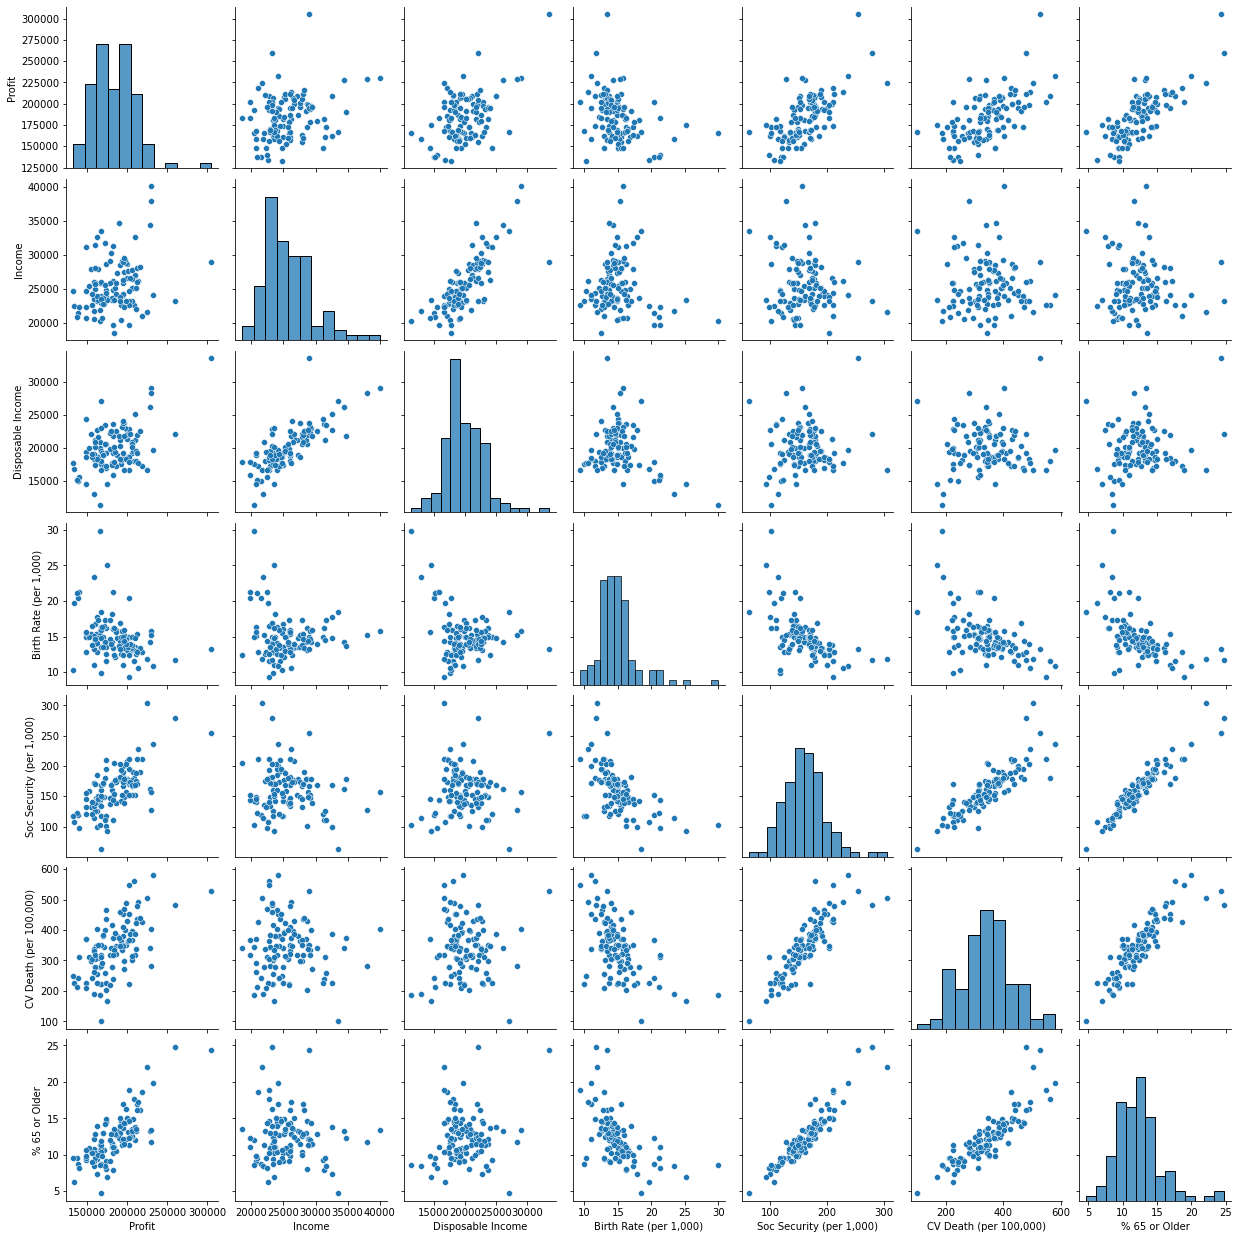

In [18]:
sns_plot = sns.pairplot(df_p)

In [35]:
def four_in_one(dataframe,model):
    fitted_y = model.fittedvalues
    studentized_residuals = model.get_influence().resid_studentized_internal
    plt.figure(figsize=(10,10))
    ax1 = plt.subplot(221)
    stats.probplot(studentized_residuals, dist="norm", plot=plt)
    ax1.set_title('Normal Q-Q')
    ax1.set_xlabel('Normal Quantiles')
    ax1.set_ylabel('Studentized Residuals');

    ax2 = plt.subplot(222)
    ax2.hist(studentized_residuals)
    ax2.set_xlabel('Studentized Residuals')
    ax2.set_ylabel('Count')
    ax2.set_title('Histogram')

    ax3 = plt.subplot(223)
    t = range(dataframe.shape[0])
    ax3.scatter(t, studentized_residuals)
    ax3.set_xlabel('Observation order')
    ax3.set_ylabel('Residuals')
    ax3.set_title('Time series plot of studentized residuals')

    ax4 = plt.subplot(224)
    ax4 = sns.residplot(fitted_y, studentized_residuals,
                              lowess=True,
                              scatter_kws={'alpha': 0.5},
                              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    ax4.set_title('Internally Studentized Residuals vs Fitted values')
    ax4.set_xlabel('Fitted values')
    ax4.set_ylabel('Studentized Residuals');

In [30]:
X = df_p.drop(columns=["Profit"])
Y = df_p['Profit']


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     53.12
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           2.41e-29
Time:                        19:54:48   Log-Likelihood:                -1199.0
No. Observations:                 110   AIC:                             2412.
Df Residuals:                     103   BIC:                             2431.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

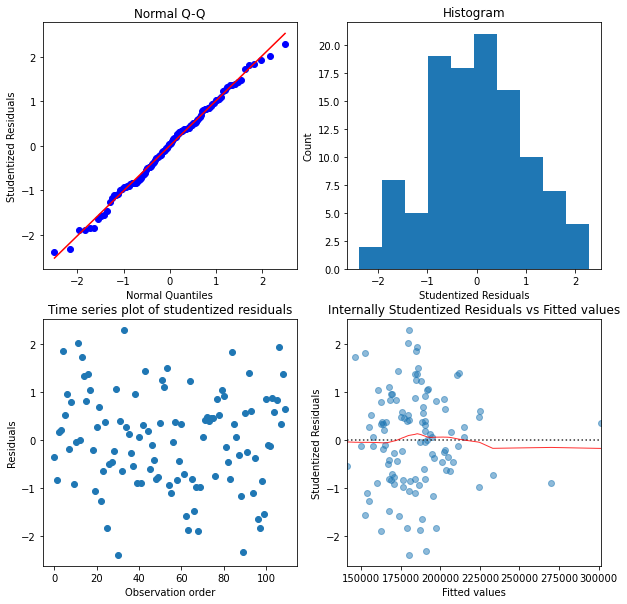

In [36]:
model_fit1 = sm.OLS(Y,sm.add_constant(X)).fit()
print(model_fit1.summary())
four_in_one(df_p,model_fit1)